<a href="https://colab.research.google.com/github/Aburas98/NMA-kay-V_cortex_Modelling/blob/main/GLM_kay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import dataset and libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_labels_val.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/yqb3e/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [ ]:
with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')


`labels` is a 4 by stim array of class names:  
- row 3 has the labels predicted by a deep neural network (DNN) trained on Imagenet
- rows 0-2 correspond to different levels of the wordnet hierarchy for the DNN predictions

`dat` has the following fields:  
- `stimuli`: stim x i x j array of grayscale stimulus images
- `stimuli_test`: stim x i x j array of grayscale stimulus images in the test set  
- `responses`: stim x voxel array of z-scored BOLD response amplitude
- `responses_test`:  stim x voxel array of z-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

# Divide ROIs for training set

In [ ]:
roi_responses_list = []
for roi_index in range(1,8):
    bold_index = dat['roi'] == roi_index
    roi_responses_list.append(
        np.array([ bold[bold_index] for bold in dat['responses']]))
np_v1, np_v2, np_v3, np_v3a, np_v3b, np_v4, np_latocc = roi_responses_list


# Divide ROIs for test set

In [ ]:
# I did not use this for prediction as I initially intended, because test set has less labels than training set (less categorical variables)
troi_responses_list = []
for roi_index in range(1,8):
    bold_index = dat['roi'] == roi_index
    troi_responses_list.append(
        np.array([ bold[bold_index] for bold in dat['responses_test']]))
np_v1test, np_v2test, np_v3test, np_v3atest, np_v3btest, np_v4test, np_latocctest = troi_responses_list 

# Encode labels and construct the design matrix X

In [ ]:
level1 = labels[0,:]
print(level1.shape)

(1750,)


In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(level1)
print(integer_encoded.shape)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
X = onehot_encoder.fit_transform(integer_encoded)
print(X.shape)

(1750,)
(1750, 8)


In [ ]:
X_t = np.transpose(X)
mult = np.dot(X_t,X)
print(mult.shape)
# check for multicollinearity
np.linalg.det(mult) == 0 

(8, 8)


False

In [ ]:
print(level1[10:20])
print(X[10:20])
x = np.where()

['artifact' 'artifact' 'artifact' 'animal' 'geological formation' 'entity'
 'artifact' 'animal' 'animal' 'artifact']
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
Y = dat["responses"]

In [ ]:
Y.shape

(1750, 8428)

#Import model and fit to data



In [ ]:
import sklearn as sk
from sklearn import linear_model
from sklearn.metrics import r2_score

## Model fitting for V1

In [ ]:
model1 = linear_model.MultiTaskLassoCV(cv=6, random_state=0).fit(X,np_v1)
v1_score = r2_score(np_v1, model1.predict(X))
print(f"R2 score for V1 is {v1_score}")

## Model fitting for V2

In [ ]:
model2 = linear_model.MultiTaskLassoCV(cv=6, random_state=0).fit(X,np_v2)
v2_score = r2_score(np_v2, model2.predict(X))
print(f"R2 score for V2 is {v2_score}")

R2 score for V2 is 0.0008442358838341754


## Model fitting for V3

In [ ]:
model3 = linear_model.MultiTaskLassoCV(cv=6, random_state=0).fit(X,np_v3)
v3_score = r2_score(np_v3, model3.predict(X))
print(f"R2 score for V3 is {v3_score}")

R2 score for V3 is 0.001023488631134326


## Model fitting for V3A

In [ ]:
model3a = linear_model.MultiTaskLassoCV(cv=6, random_state=0).fit(X,np_v3a)
v3a_score = r2_score(np_v3a, model3a.predict(X))
print(f"R2 score for V3a is {v3a_score}")

R2 score for V3a is 0.0024178710597828005


## Model fitting for V3B

In [ ]:
model3b = linear_model.MultiTaskLassoCV(cv=6, random_state=0).fit(X,np_v3b)
v3b_score = r2_score(np_v3b, model3b.predict(X))
print(f"R2 score for V3b is {v3b_score}")

R2 score for V3b is 0.005073717254267692


In [ ]:
model4 = linear_model.MultiTaskLassoCV(cv=6, random_state=0).fit(X,np_v4)
v4_score = r2_score(np_v4, model4.predict(X))
print(f"R2 score for V4 is {v4_score}")

## Model fitting for LO

In [ ]:
model_lo = linear_model.MultiTaskLassoCV(cv=6, random_state=0).fit(X,np_latocc)
lo_score = r2_score(np_latocc, model_lo.predict(X))
print(f"R2 score for LO is {lo_score}")

R2 score for LO is 0.005980201825683018


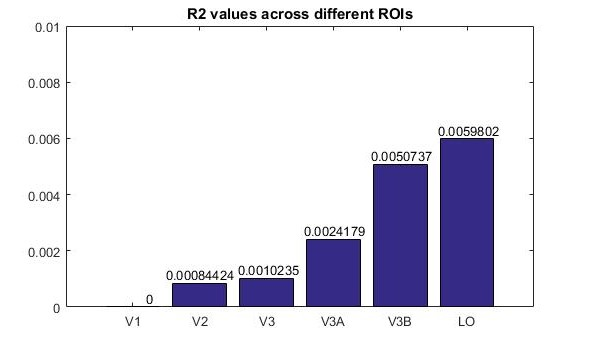